# Classificando Instrumentos

**Objetivos**
1. Passar para os discentes qual será o ambiente base que vamos utilizar neste curso
1. Listar quais são as bibliotecas necessárias
1. Um pequeno tutorial de instalação de pacotes

**Resultado Esperado**
1. Um pequeno ambiente com miniconda além das bibliotecas que vamos utilizar
1. Principalmente relevante para discentes que não tem tanto conhecimento de Python

Este notebook deve explorar um pouco do ciclo de trabalho completo do profissional de MIR!

![alt text](https://dcc.ufmg.br/~flaviovdf/mir/lab06/imgs/fig-0.png)

In [2]:
sh = """
LAB=lab06

echo "Baixando os arquivos do lab. Pode demorar um pouco."
if [ -f files.zip ]; then rm files.zip; fi
wget -q --no-check-certificate --show-progress \
        https://dcc.ufmg.br/~flaviovdf/mir/$LAB/files.zip
echo

if [ -f files.zip ]; then
    echo "Extraindo..."
    unzip -o files.zip
    if ! [ $? -eq 0 ]; then
        echo "Erro extraindo o arquivo!"
    fi
else
    echo "Arquivo não baixado!"
fi
"""
with open('script.sh', 'w') as file:
  file.write(sh)

! bash script.sh

Baixando os arquivos do lab. Pode demorar um pouco.
files.zip           100%[===================>] 172.14M  10.1MB/s    in 11s     

Extraindo...
Archive:  files.zip
  inflating: instrument/flute/flute.nonvib.ff.B3B4.wav  
  inflating: instrument/flute/flute.nonvib.ff.C7Db7.wav  
  inflating: instrument/flute/flute.nonvib.ff.C5B5.wav  
  inflating: instrument/flute/flute.nonvib.ff.C7Db7.aiff  
  inflating: instrument/flute/flute.nonvib.ff.B3B4.aiff  
  inflating: instrument/flute/flute.nonvib.ff.C6B6.wav  
  inflating: instrument/flute/flute.nonvib.ff.C5B5.aiff  
  inflating: instrument/flute/flute.nonvib.ff.C6B6.aiff  
  inflating: instrument/clarinet/EbClar.ff.C5B5.aiff  
  inflating: instrument/clarinet/EbClar.ff.G3B3.wav  
  inflating: instrument/clarinet/EbClar.ff.C6A6.wav  
  inflating: instrument/clarinet/EbClar.ff.C6A6.aiff  
  inflating: instrument/clarinet/EbClar.ff.C5B5.wav  
  inflating: instrument/clarinet/EbClar.ff.C4B4.aiff  
  inflating: instrument/clarinet/EbClar.ff.G3

  inflating: instrument/vibraphone/Vibraphone.dampen.ff.F4.stereo.wav  
  inflating: instrument/vibraphone/Vibraphone.dampen.ff.Bb5.stereo.wav  
  inflating: instrument/vibraphone/Vibraphone.dampen.ff.B5.stereo.wav  
  inflating: instrument/vibraphone/Vibraphone.dampen.ff.Db3.stereo.aif  
  inflating: instrument/vibraphone/Vibraphone.dampen.ff.Db5.stereo.wav  
  inflating: instrument/vibraphone/Vibraphone.dampen.ff.Eb4.stereo.wav  
  inflating: instrument/vibraphone/Vibraphone.dampen.ff.Ab5.stereo.wav  
  inflating: instrument/vibraphone/Vibraphone.dampen.ff.B5.stereo.aif  
  inflating: instrument/vibraphone/Vibraphone.dampen.ff.A3.stereo.aif  
  inflating: instrument/vibraphone/Vibraphone.dampen.ff.Ab4.stereo.wav  
  inflating: instrument/vibraphone/Vibraphone.dampen.ff.A4.stereo.wav  
  inflating: instrument/vibraphone/Vibraphone.dampen.ff.E4.stereo.wav  
  inflating: instrument/vibraphone/Vibraphone.dampen.ff.Db6.stereo.wav  
  inflating: instrument/violin/Violin.arco.ff.sulG.C5D5.m

  inflating: instrument/violin/Violin.arco.ff.sulA.C5B5.mono.aif  
  inflating: instrument/violin/Violin.arco.mf.sulD.D4B4.mono.aif  
  inflating: instrument/violin/Violin.arco.pp.sulG.G3B3.mono.aif  
  inflating: instrument/violin/Violin.arco.ff.sulD.C6.mono.aif  


In [3]:
import librosa
import librosa.display

import IPython.display as ipd

import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

plt.rcParams['figure.figsize'] = (16, 10)

plt.rcParams['axes.axisbelow'] = True 
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['axes.spines.bottom'] = True
plt.rcParams['axes.spines.left'] = True
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.ymargin'] = 0.1

plt.rcParams['font.family'] = 'serif'

plt.rcParams['axes.grid'] = True
plt.rcParams['grid.color'] = 'lightgrey'
plt.rcParams['grid.linewidth'] = .1

plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['xtick.bottom'] = True
plt.rcParams['xtick.direction'] = 'out' 
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['xtick.minor.width'] = .5
plt.rcParams['xtick.minor.visible'] = True

plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['ytick.left'] = True
plt.rcParams['ytick.direction'] = 'out'
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['ytick.minor.size'] = 3
plt.rcParams['ytick.minor.width'] = .5
plt.rcParams['ytick.minor.visible'] = True

plt.rcParams['legend.fontsize'] = 20

plt.rcParams['lines.linewidth'] = 4
plt.rcParams['lines.markersize'] = 10
plt.rcParams['lines.markeredgecolor'] = 'black'
plt.rcParams['patch.edgecolor'] = 'black'

plt.style.use('tableau-colorblind10')
plt.ion()

## Arquivos de Música

Antes de executar tarefas de aprendizado de máquina, temos que processar nossos arquivos. Alguns dos passos são demonstrados na figura abaixo.

![alt text](fig-1.png)

Para chegar no nosso objetivo final, acompanhando este Notebook deve vir uma pasta com alguns arquivos de música tanto no formato [AIFF](https://en.wikipedia.org/wiki/Audio_Interchange_File_Format) quanto no formato [WAV](https://en.wikipedia.org/wiki/WAV). No meu computador tive problemas com os arquivos AIFF, por isso faço uso do .wav abaixo.

Para observar os arquivos podemos fazer uso de alguns comandos Unix. Para executar comandos do terminal no Notebook, basta utilizar `!`.

In [4]:
! ls instrument

clarinet  flute  vibraphone  violin


In [5]:
! ls instrument/flute

flute.nonvib.ff.B3B4.aiff  flute.nonvib.ff.C6B6.aiff
flute.nonvib.ff.B3B4.wav   flute.nonvib.ff.C6B6.wav
flute.nonvib.ff.C5B5.aiff  flute.nonvib.ff.C7Db7.aiff
flute.nonvib.ff.C5B5.wav   flute.nonvib.ff.C7Db7.wav


Observe como cada pasta contém uma série de arquivos. Vamos tocar um deles. Para tocar arquivos de música bastar fazer uso da chamada:

[IPython.display.Audio](https://ipython.org/ipython-doc/2/api/generated/IPython.lib.display.html)

In [6]:
import IPython.display as ipd
ipd.Audio(filename='instrument/flute/flute.nonvib.ff.B3B4.wav')

In [7]:
import IPython.display as ipd
ipd.Audio(filename='instrument/violin/Violin.arco.ff.sulA.A4B4.mono.wav')

## Observando a forma de onda

Agora podemos prosseguir e observar um pouco qual é a [Forma de onda](https://pt.wikipedia.org/wiki/Forma_de_onda) destes arquivos. Aqui o LibRosa é particularmente útil, pois o mesmo consegue ler o arquivo de dados e nos indicar qual a [taxa de amostragem](https://pt.wikipedia.org/wiki/Amostragem_de_sinal) do mesmo.

Assim como arquivos de vídeo, é necessário fazer uma amostragem do sínal música para um formato digital. A taxa de amostragem nos indica, na média, quantas amostras existem em um segundo.

In [8]:
flute1, sr_flute_1 = librosa.load('instrument/flute/flute.nonvib.ff.B3B4.wav')
sr_flute_1

22050

Observe como a chamada retorna 2 valores. O primeiro é o sinal na forma de um vetor numpy. O segundo é a taxa de amostragem. Cada som na pasta foi amostrado em uma taxa de `22kHz` (22 mil amostras por segundo, já que 1Hz é um ciclo por segundo).

Abaixo vemos o tipo do arquivo de música na memória.

In [9]:
type(flute1)

numpy.ndarray

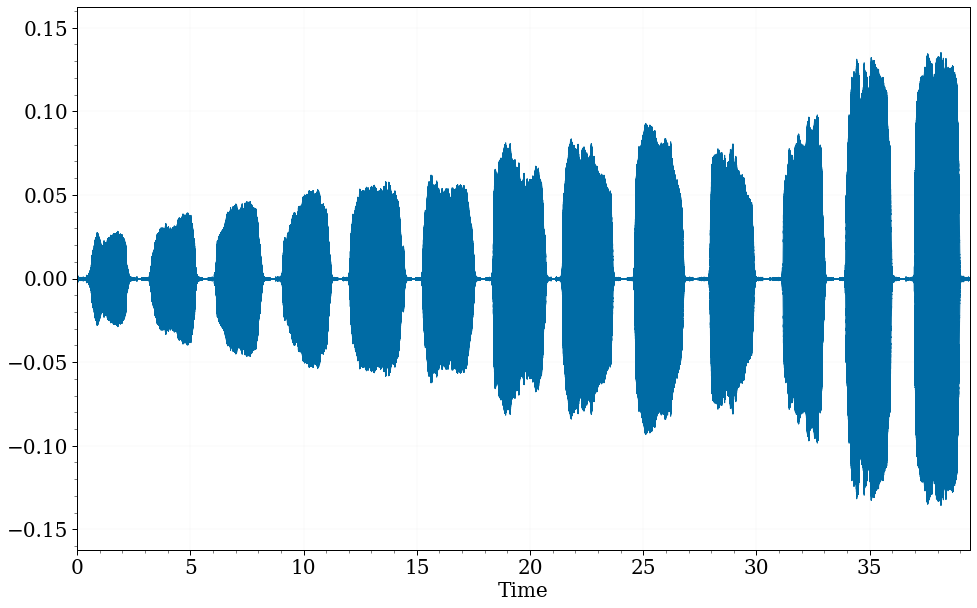

In [10]:
import librosa.display
fig, ax = plt.subplots(1, 1)
librosa.display.waveplot(flute1, sr=sr_flute_1, ax=ax)

Observe que o nosso vetor tem mais ou menos 86000 quadros, ou posições.

In [11]:
flute1.shape

(869341,)

Como tal música foi amostrada com 22k quadros por segundo, basta fazer `86k/22k` para chegar na duração final. Isto deve ser próximo de 39 segundos, assim como é exemplificado no gráfico acima.

In [12]:
flute1.shape[0] / 22050

39.42589569160998

Vamos comparar com um um violino

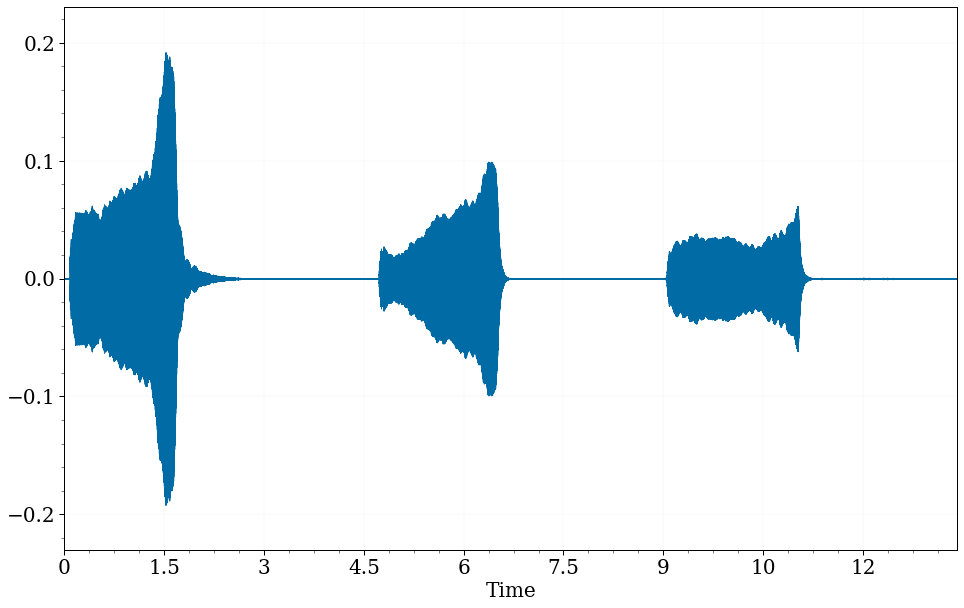

In [13]:
vio1, sr_vio_1 = librosa.load('instrument/violin/Violin.arco.ff.sulA.A4B4.mono.wav')
fig, ax = plt.subplots(1, 1)
librosa.display.waveplot(vio1, sr=sr_vio_1, ax=ax)

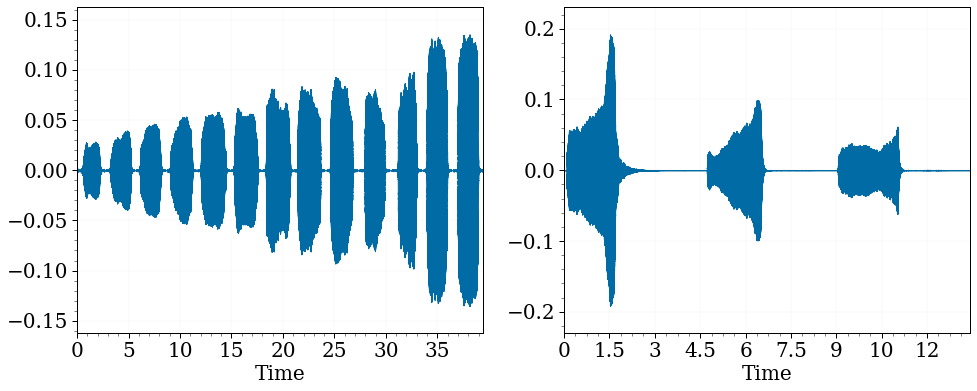

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
librosa.display.waveplot(flute1, sr=sr_vio_1, ax=ax[0])
librosa.display.waveplot(vio1, sr=sr_vio_1, ax=ax[1])

Nossa primeira tenativa de resolver este problema será em usar o vetor musical direto como atributos de um algoritmo de aprendizado de máquina. Com tal objetivo, já podemos observar alguns dos problemas que vamos ter ao fazer o processamento de músicas. 

O primeiro é que dependendo do caso, teremos `869341` atributos. Algo bem irreal de tratar com aprendizado de máquina simples. O segundo, também importante, é que cada arquivo tem uma duração diferente. Tal problema limita, por exemplo, o uso de algoritmos de aprendizado de máquina que necessitam da mesma quantidade de atributos por exemplo.

Tal problema motiva o uso de técnicas de MIR que convertem músicas em atributos mais simples. Assim, podemos aplicar técnicas de aprendizado de máquina. Até o momento no curso não vimos como tais técnicas funcionam, porém neste notebook podemos ter uma noção de qual é o fluxo de trabalho do profissional de MIR.

## Olhando o Espectograma

Para tratar com tais problemas, vamos então extrair atributos do [Espectograma](https://en.wikipedia.org/wiki/Spectrogram) da música. A extração de espectogramas será tratada ainda na primeira parte do curso. Observe os comentários das chamadas abaixo.

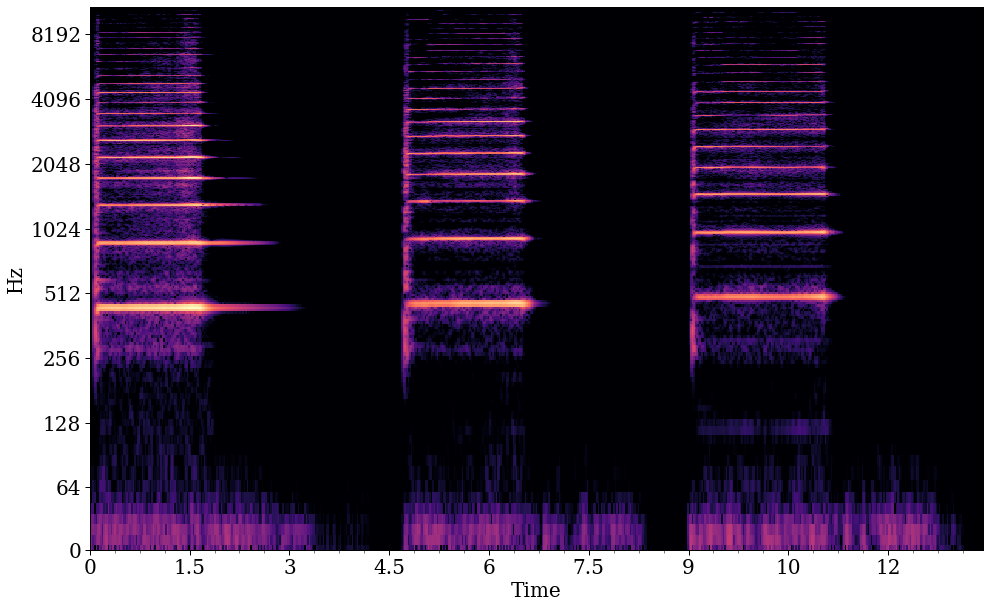

In [15]:
# Faça a transformada de Fourier do sinal. Assim pegamos "a quantidade" de sinal em cada frequência por segundo.
transform = librosa.stft(y=vio1)

# Como a transformada de fourier é um número complexo, multiplique os coeficientes.
S, phase = librosa.magphase(transform)

# Plote o espectograma
fig, ax = plt.subplots(1, 1)
mesh = librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max), # intensidade da cor em decibéis
                                y_axis='log', x_axis='time', ax=ax)

Um atributo interessante é o centroide do espectograma. De forma simples, para cada janela de tempo tiramos o centroide da intensidade, convertendo assim o espectograma para um valor simples.

[Text(0.5, 1.0, 'log Power spectrogram')]

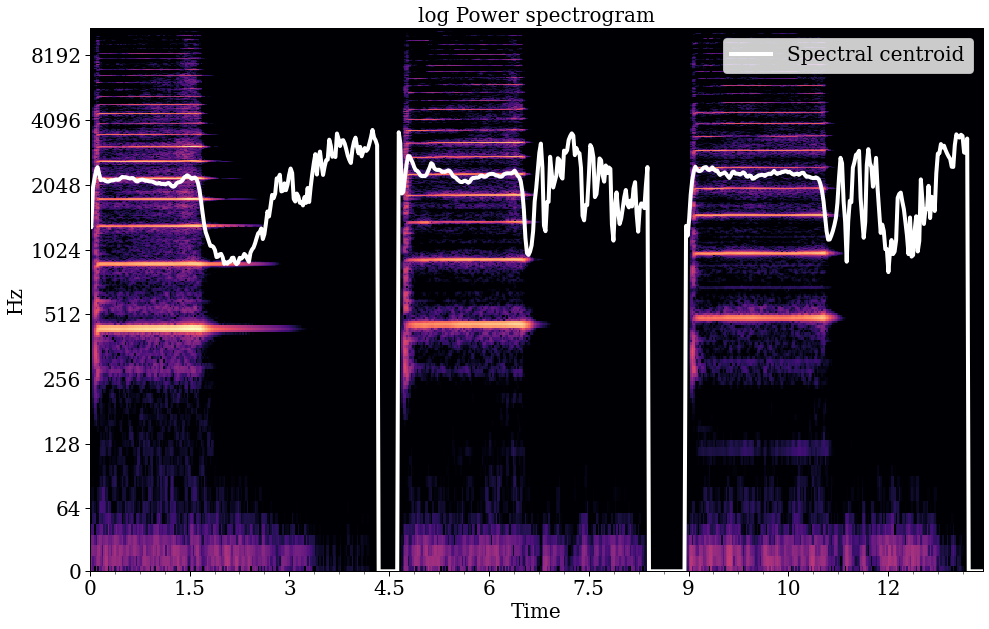

In [16]:
cent = librosa.feature.spectral_centroid(y=vio1)
times = librosa.times_like(cent)
S, phase = librosa.magphase(librosa.stft(y=vio1))

fig, ax = plt.subplots(1, 1)
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax)
ax.plot(times, cent.T, label='Spectral centroid', color='w')
ax.legend(loc='upper right')
ax.set(title='log Power spectrogram')

Vamos comparar com outro instrumento.

[Text(0.5, 1.0, 'log Power spectrogram')]

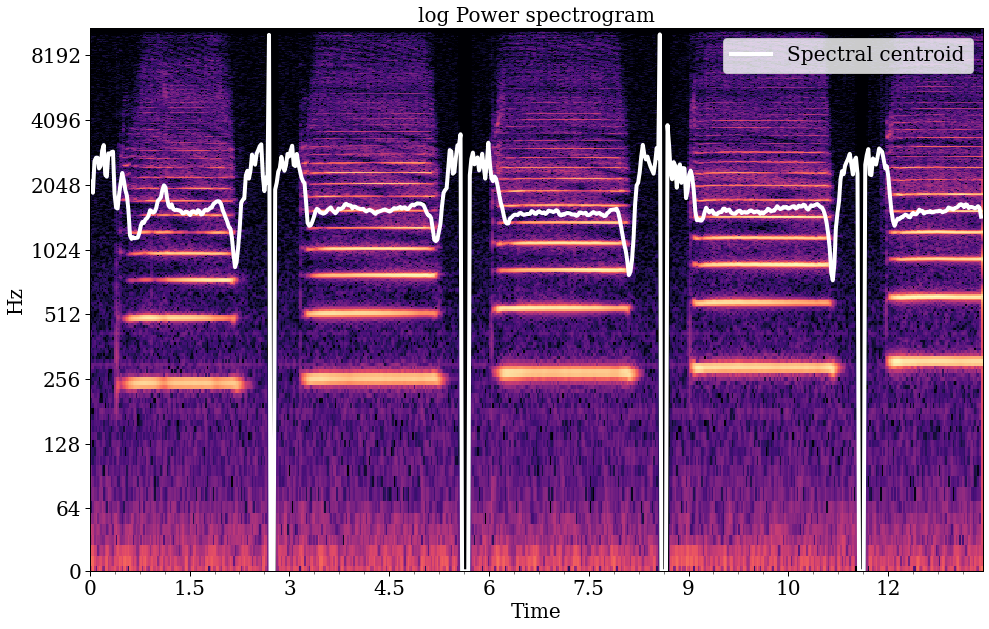

In [17]:
flute_trim = flute1[:len(vio1)] # Cortando a flauta para a mesma quantidade de tempo do violino

cent = librosa.feature.spectral_centroid(y=flute_trim)
times = librosa.times_like(cent)
S, phase = librosa.magphase(librosa.stft(y=flute_trim))

fig, ax = plt.subplots(1, 1)
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax)
ax.plot(times, cent.T, label='Spectral centroid', color='w')
ax.legend(loc='upper right')
ax.set(title='log Power spectrogram')

## Segmentando

Observe mais uma vez um único arquivo. Uma característica importante do mesmo é que a mesma nota é repetida várias vezes. Isto permite ampliar nossa base de dados caso tais segmentos sejam identificáveis. 

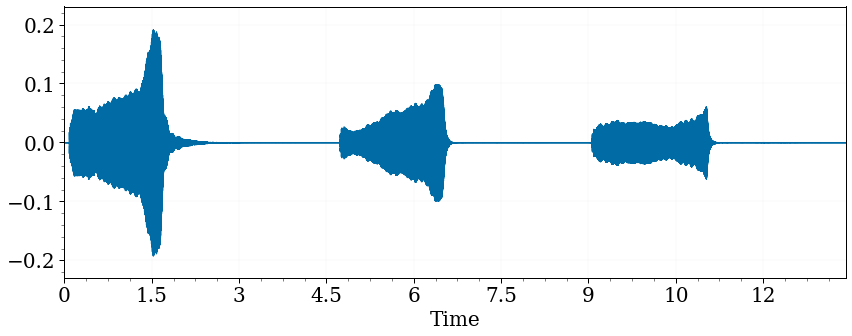

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(14, 5))
librosa.display.waveplot(vio1, sr=sr_vio_1, ax=ax)

Vamos entender quantos elementos são zero e quantos são diferentes de zero. Um fator interessante de numpy é que podemos de forma muito simples criar vetores de booleanos.

In [19]:
is_zero = vio1 == 0
print(is_zero)
print(is_zero.sum())

[ True  True  True ...  True  True  True]
40924


Aqui são os diferentes de zero.

In [20]:
is_zero = vio1 != 0
print(is_zero.sum())

254897


Para mostrar a ideia da segmentação vamos usar um vetor mais simples.

```python
x = np.array([0, 0, 2, 3, 4, 0, 0, 4, 5, 0])
d = np.array(x == 0, dtype='i')
```

O vetor `d` vai ter a seguinte forma:

```array([1, 1, 0, 0, 0, 1, 1, 0, 0, 1], dtype=int32)```

Ou seja, o mesmo vai ser 1 quando o elemento é zero em `x`. Vai ter valor 0 caso contrário.

Agora, observe as diferenças entre elementos consecutivos de `d`:

```
1 - 1 = 0 (isto quer dizer que temos dois zeros lado a lado)
0 - 1 = -1 (isto quer dizer que chegamos em um valor não zero)
1 - 0 = 1 (isto quer dizer que chegamos em um valor não zero)
```

Podemos criar esse vetor de forma simples com o comando `np.diff`.

In [21]:
x = np.array([0, 0, 2, 3, 4, 0, 0, 4, 5, 0])
d = np.array(x == 0, dtype='i')
np.diff(d, prepend=d[0]) # o prepend é para garantir a mesma dimensão de x

array([ 0,  0, -1,  0,  0,  1,  0, -1,  0,  1], dtype=int32)

Em absoluto

In [22]:
bg_ed = np.abs(np.diff(d, prepend=d[0]))

Como `bg_ed[2] == 1`, estamos indicando que algum sinal começa aqui. Olhe se não é verdade em:

```python
x = np.array([0, 0, 2, 3, 4, 0, 0, 4, 5, 0])
```

`x[2] = 2`. Agora, como `bg_ed[5] == 1`, estamos dizendo que o sinal termina em 5. Ou seja, de `[2:5]` é sinal!

`np.where` acha tal sinal!

In [23]:
idx = np.where(bg_ed)[0]
idx

array([2, 5, 7, 9])

Agora basta iterar par a par e achar os segmentos!

**o código até aqui só funciona se o sinal termina em zero, mas ok, dá para entender a ideia**

In [24]:
for i in range(0, len(idx), 2):
    if i + 1 < len(idx):
        bg = idx[i]
        ed = idx[i+1]
        
        print(x[bg:ed])

[2 3 4]
[4 5]


Agora podemos criar nossa função. A heurística acima não é perfeita pois o vetor das notas não é realmente zerado. De qualquer forma, podemos considerar que uma nota toca por pelo menos 1 segundo. Quantos quadros equivalem a um segundo? *A taxa de amostragem!*.

In [25]:
def segment(x, sr=22050):
    x = [0] + [d for d in x] + [0]
    x = np.array(x)
    d = np.array(x == 0, dtype='i')
    bg_ed = np.abs(np.diff(d, prepend=d[0]))
    idx = np.where(bg_ed)[0]
    for i in range(0, len(idx), 2):
        if i + 1 < len(idx):
            bg = idx[i]
            ed = idx[i+1]
            cand = x[bg:ed]
            
            if len(cand) >= sr:
                yield cand

Observe como temos várias notas em um único arquivo.

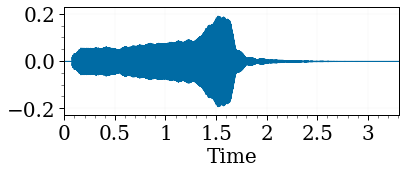

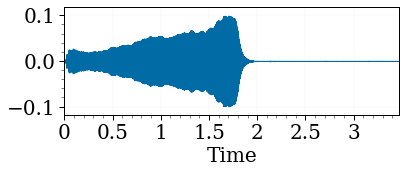

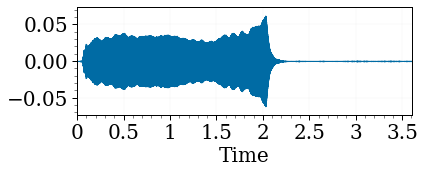

In [26]:
for note in segment(vio1):
    fig, ax = plt.subplots(1, 1, figsize=(6, 2))
    librosa.display.waveplot(note, sr=sr_vio_1, ax=ax)
    plt.show()

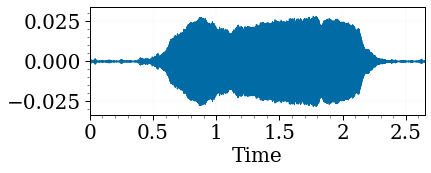

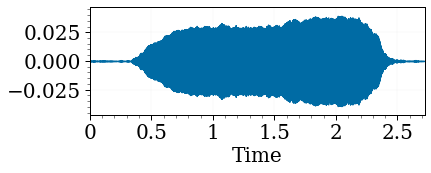

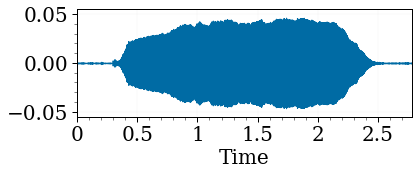

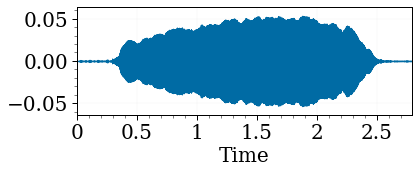

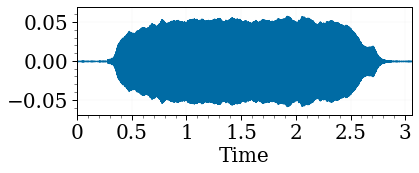

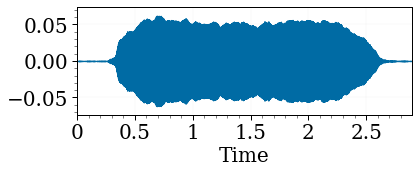

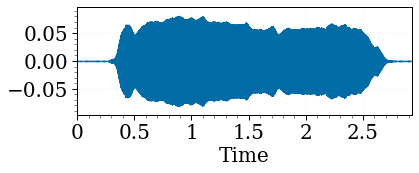

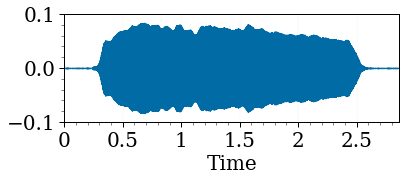

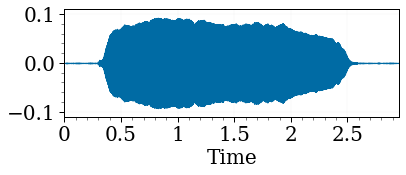

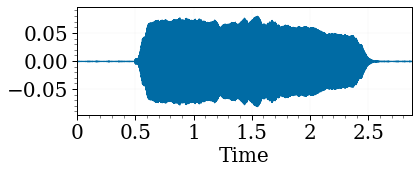

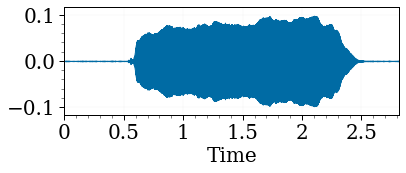

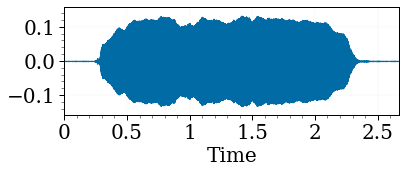

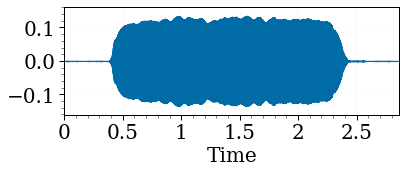

In [27]:
for note in segment(flute1):
    fig, ax = plt.subplots(1, 1, figsize=(6, 2))
    librosa.display.waveplot(note, ax=ax)
    plt.show()

## Um Classificador Ainda sem Entender MIR com Detalhes

### Criando uma Base de Dados

Para começar nossa tarefa de um classificador ultra simples, primeiro temos que ler todo o conjunto de músicas. Aqui, o módulo [Glob](https://docs.python.org/3/library/glob.html) de Python vai ser útil. O mesmo permite uma navegação em todas as pastas de um diretório via expressões regulares.

In [28]:
import glob

Observe a chamada abaixo:
1. Na pasta instrument
1. Entre em quaquer, `*/`, subpasta
1. Além do mais, procure qualquer coisa em `wav`, `*.wav`.

In [29]:
glob.glob('instrument/*/*.wav')

['instrument/flute/flute.nonvib.ff.C5B5.wav',
 'instrument/flute/flute.nonvib.ff.C6B6.wav',
 'instrument/flute/flute.nonvib.ff.B3B4.wav',
 'instrument/flute/flute.nonvib.ff.C7Db7.wav',
 'instrument/violin/Violin.arco.ff.sulE.C6B6.mono.wav',
 'instrument/violin/Violin.arco.mf.sulA.A4B4.mono.wav',
 'instrument/violin/Violin.arco.ff.sulA.C6Ab6.mono.wav',
 'instrument/violin/Violin.arco.mf.sulE.C7E7.mono.wav',
 'instrument/violin/Violin.arco.mf.sulE.E5B5.mono.wav',
 'instrument/violin/Violin.arco.ff.sulD.C5B5.mono.wav',
 'instrument/violin/Violin.arco.mf.sulG.C5F5.mono.wav',
 'instrument/violin/Violin.arco.ff.sulE.E5B5.mono.wav',
 'instrument/violin/Violin.arco.ff.sulG.C5D5.mono.wav',
 'instrument/violin/Violin.arco.pp.sulE.C6B6.mono.wav',
 'instrument/violin/Violin.arco.ff.sulG.G3B3.mono.wav',
 'instrument/violin/Violin.arco.pp.sulD.C5B5.mono.wav',
 'instrument/violin/Violin.arco.pp.sulA.C6.mono.wav',
 'instrument/violin/Violin.arco.ff.sulA.A4B4.mono.wav',
 'instrument/violin/Violin.arco.

Agora um pouco de magia python para ler tudo. Explicando o código abaixo.

1. Leia o arquivo com LibRosa.
2. Guarde a taxa de amostragem em um conjunto
3. Separe o arquivo por instrumento em um dicionário

Além disso vamos nos limitar a 4 amostras por instrumento (primeiro if).

In [30]:
raw_data = {}
rates = set()
for fpath in glob.glob('instrument/*/*.wav'):
    inst_name = fpath.split('/')[1]
    if inst_name in raw_data and len(raw_data[inst_name]) == 4:
        continue
        
    audio, sr = librosa.load(fpath)
    rates.add(sr)
    
    if inst_name not in raw_data:
        raw_data[inst_name] = []
        
    raw_data[inst_name].append(audio)

Os exemplos tem tamanhos diferentes, já vamos tratar.

In [31]:
for inst in raw_data:
    print(inst)
    for aud in raw_data[inst]:
        print(len(aud))

flute
743425
682644
869341
117184
violin
1423538
589304
871361
657748
clarinet
302571
681300
591255
709504
vibraphone
18981
24262
24682
21037


Ok, agora vamos extrair o centroide espectral de cada arquivo. Como os arquivos tem tamanhos diferentes, cada centroide também vai ter tamanhos diferentes. Tais tamanhos são definidos pelo tamanho da janela utilizada para fazer a transformada de fourier (novamente, assunto futuro). Vamos observar qual o menor tamanho na base. Parece que é 30!

In [32]:
for inst in raw_data:
    for aud in raw_data[inst]:
        cent = librosa.feature.spectral_centroid(y=aud, sr=22000)
        print(cent.shape)

(1, 1453)
(1, 1334)
(1, 1698)
(1, 229)
(1, 2781)
(1, 1151)
(1, 1702)
(1, 1285)
(1, 591)
(1, 1331)
(1, 1155)
(1, 1386)
(1, 38)
(1, 48)
(1, 49)
(1, 42)


Vamos criar um DataFrame pandas sem nada. O mesmo será usado para nosso classificador.

In [33]:
names = ['instrument']
for i in range(30):
    names.append(f'cent_{i}')
df = pd.DataFrame(columns=names)
df

Empty DataFrame
Columns: [instrument, cent_0, cent_1, cent_2, cent_3, cent_4, cent_5, cent_6, cent_7, cent_8, cent_9, cent_10, cent_11, cent_12, cent_13, cent_14, cent_15, cent_16, cent_17, cent_18, cent_19, cent_20, cent_21, cent_22, cent_23, cent_24, cent_25, cent_26, cent_27, cent_28, cent_29]
Index: []

[0 rows x 31 columns]

O código abaixo cola os 30 primeiros valores de cada centroid em uma linha do dataframe.

In [34]:
for inst in raw_data:
    for aud in raw_data[inst]:
        cent = librosa.feature.spectral_centroid(y=aud)
        row = {}
        for i in range(30):
            row[f'cent_{i}'] = cent[0, i]
        row['instrument'] = inst
        df = df.append(row, ignore_index=True)

In [35]:
df

instrument       cent_0       cent_1       cent_2        cent_3  \
0        flute     0.000000     0.000000     0.000000  10269.400727   
1        flute  2685.007593  2592.082458  2441.817147   2524.502381   
2        flute  2055.855559  2123.145863  1882.832788   2641.616678   
3        flute  2759.866509  2696.733730  2362.006968   2342.103259   
4       violin     0.000000     0.000000     0.000000      0.000000   
5       violin  2473.252006  1947.848180  2236.386750   2394.994457   
6       violin     0.000000     0.000000     0.000000      0.000000   
7       violin     0.000000     0.000000     0.000000      0.000000   
8     clarinet     0.000000     0.000000     0.000000      0.000000   
9     clarinet     0.000000     0.000000     0.000000      0.000000   
10    clarinet     0.000000     0.000000     0.000000      0.000000   
11    clarinet     0.000000     0.000000     0.000000      0.000000   
12  vibraphone  1689.322569  1338.897787   847.136771    778.307368   
13  vibraphone  2109.721623  1953.298596  1448.393737   1184.021961   
14  vibraphone  1712.767846  1492.584009  1046.560331    951.214549   
15  vibraphone  2353.883349  2073.529925  1538.805177    869.878886   

         cent_4       cent_5       cent_6       cent_7       cent_8  ...  \
0   1904.814588  2220.859214  2496.618525  2354.613023  2513.407641  ...   
1   2293.488729  2658.102350  2209.608792  2031.644150  2392.827416  ...   
2   2739.212794  2739.549429  2443.067988  2512.382709  2959.904325  ...   
3   2913.388354  2758.974010  2680.841241  2871.680327  2261.126279  ...   
4      0.000000     0.000000     0.000000     0.000000     0.000000  ...   
5   2276.015506  2252.950993  2248.306487  2321.646614  2294.026897  ...   
6      0.000000     0.000000     0.000000     0.000000     0.000000  ...   
7      0.000000     0.000000     0.000000     0.000000     0.000000  ...   
8      0.000000     0.000000     0.000000     0.000000     0.000000  ...   
9      0.000000     0.000000     0.000000     0.000000     0.000000  ...   
10     0.000000     0.000000     0.000000     0.000000     0.000000  ...   
11     0.000000     0.000000     0.000000     0.000000     0.000000  ...   
12   732.190064   717.339857   700.190775   681.808167   670.639994  ...   
13  1101.687584  1025.462385   973.262643   962.404117   988.880765  ...   
14   940.568819   937.559906   931.660139   926.355200   913.933281  ...   
15   791.430260   725.787078   696.423659   688.067178   673.599392  ...   

        cent_20      cent_21      cent_22      cent_23      cent_24  \
0   1345.957432  1352.227698  1425.591875  1453.646798  1421.545578   
1   1887.359442  1860.348109  1847.542461  1842.925417  1821.283250   
2   2099.190807  2326.994016  2151.460727  1941.903820  1824.344966   
3   3115.312964  3110.201522  3176.164715  3191.366986  3150.552059   
4   2758.508691  2632.026397  2142.950459  2033.766475  2317.765953   
5   2255.057885  2278.832014  2290.256460  2297.021044  2364.476298   
6   2535.203365  2762.994607  2878.624062  2805.250799  2727.395024   
7    257.883001   213.289222   513.543865  1193.829220  2020.912111   
8      0.000000     0.000000     0.000000     0.000000     0.000000   
9      0.000000  1811.191935  1895.576435  1895.145794  2088.709816   
10     0.000000     0.000000     0.000000     0.000000     0.000000   
11     0.000000     0.000000     0.000000     0.000000     0.000000   
12  1154.381824  1251.829853  1446.299328  1744.696794  2026.620144   
13  1632.789261  1794.400381  2021.774428  2122.420609  2141.704122   
14  1013.480526  1045.802041  1079.043575  1132.631067  1210.655327   
15   881.197810   985.865755  1162.628013  1410.591341  1687.892928   

        cent_25      cent_26      cent_27      cent_28      cent_29  
0   1413.511644  1412.803809  1416.979168  1428.471723  1437.919679  
1   1844.946430  1853.870117  1851.744607  1854.887557  1843.470009  
2   1560.105591  1191.645376  1148.246546  1170.132217  1158.222065  
3   3126.721437

### Ufa! Finalmente, vamos classificar!

Agora podemos passar para o o nosso classificador. Observe no código abaixo como **a média das 30 janelas da média do espectograma**, leia isso com calma, é bem diferente para cada instrumento. O código usa pandas para:

1. Selecionar as 4 amostras de cada instrumento.
2. Tirar a média dos valores em cada coluna, a média da média do espectograma.

Tal diferença indica que deve ser possível fazer um trabalho até razoável de classificação com essa base.

In [36]:
for inst in raw_data:
    sub_df = df[df['instrument'] == inst]
    media = sub_df.mean(axis='columns')
    print(inst)
    print(media)
    print()

flute
0    2118.381728
1    2176.151612
2    2159.448546
3    3006.946173
dtype: float64

violin
4    1111.303218
5    2296.496754
6    1593.282463
7     609.065943
dtype: float64

clarinet
8      52.247478
9     765.271926
10      0.000000
11      0.000000
dtype: float64

vibraphone
12    1218.858598
13    1628.567965
14    1111.029622
15    1222.806082
dtype: float64



In [37]:
df

instrument       cent_0       cent_1       cent_2        cent_3  \
0        flute     0.000000     0.000000     0.000000  10269.400727   
1        flute  2685.007593  2592.082458  2441.817147   2524.502381   
2        flute  2055.855559  2123.145863  1882.832788   2641.616678   
3        flute  2759.866509  2696.733730  2362.006968   2342.103259   
4       violin     0.000000     0.000000     0.000000      0.000000   
5       violin  2473.252006  1947.848180  2236.386750   2394.994457   
6       violin     0.000000     0.000000     0.000000      0.000000   
7       violin     0.000000     0.000000     0.000000      0.000000   
8     clarinet     0.000000     0.000000     0.000000      0.000000   
9     clarinet     0.000000     0.000000     0.000000      0.000000   
10    clarinet     0.000000     0.000000     0.000000      0.000000   
11    clarinet     0.000000     0.000000     0.000000      0.000000   
12  vibraphone  1689.322569  1338.897787   847.136771    778.307368   
13  vibraphone  2109.721623  1953.298596  1448.393737   1184.021961   
14  vibraphone  1712.767846  1492.584009  1046.560331    951.214549   
15  vibraphone  2353.883349  2073.529925  1538.805177    869.878886   

         cent_4       cent_5       cent_6       cent_7       cent_8  ...  \
0   1904.814588  2220.859214  2496.618525  2354.613023  2513.407641  ...   
1   2293.488729  2658.102350  2209.608792  2031.644150  2392.827416  ...   
2   2739.212794  2739.549429  2443.067988  2512.382709  2959.904325  ...   
3   2913.388354  2758.974010  2680.841241  2871.680327  2261.126279  ...   
4      0.000000     0.000000     0.000000     0.000000     0.000000  ...   
5   2276.015506  2252.950993  2248.306487  2321.646614  2294.026897  ...   
6      0.000000     0.000000     0.000000     0.000000     0.000000  ...   
7      0.000000     0.000000     0.000000     0.000000     0.000000  ...   
8      0.000000     0.000000     0.000000     0.000000     0.000000  ...   
9      0.000000     0.000000     0.000000     0.000000     0.000000  ...   
10     0.000000     0.000000     0.000000     0.000000     0.000000  ...   
11     0.000000     0.000000     0.000000     0.000000     0.000000  ...   
12   732.190064   717.339857   700.190775   681.808167   670.639994  ...   
13  1101.687584  1025.462385   973.262643   962.404117   988.880765  ...   
14   940.568819   937.559906   931.660139   926.355200   913.933281  ...   
15   791.430260   725.787078   696.423659   688.067178   673.599392  ...   

        cent_20      cent_21      cent_22      cent_23      cent_24  \
0   1345.957432  1352.227698  1425.591875  1453.646798  1421.545578   
1   1887.359442  1860.348109  1847.542461  1842.925417  1821.283250   
2   2099.190807  2326.994016  2151.460727  1941.903820  1824.344966   
3   3115.312964  3110.201522  3176.164715  3191.366986  3150.552059   
4   2758.508691  2632.026397  2142.950459  2033.766475  2317.765953   
5   2255.057885  2278.832014  2290.256460  2297.021044  2364.476298   
6   2535.203365  2762.994607  2878.624062  2805.250799  2727.395024   
7    257.883001   213.289222   513.543865  1193.829220  2020.912111   
8      0.000000     0.000000     0.000000     0.000000     0.000000   
9      0.000000  1811.191935  1895.576435  1895.145794  2088.709816   
10     0.000000     0.000000     0.000000     0.000000     0.000000   
11     0.000000     0.000000     0.000000     0.000000     0.000000   
12  1154.381824  1251.829853  1446.299328  1744.696794  2026.620144   
13  1632.789261  1794.400381  2021.774428  2122.420609  2141.704122   
14  1013.480526  1045.802041  1079.043575  1132.631067  1210.655327   
15   881.197810   985.865755  1162.628013  1410.591341  1687.892928   

        cent_25      cent_26      cent_27      cent_28      cent_29  
0   1413.511644  1412.803809  1416.979168  1428.471723  1437.919679  
1   1844.946430  1853.870117  1851.744607  1854.887557  1843.470009  
2   1560.105591  1191.645376  1148.246546  1170.132217  1158.222065  
3   3126.721437

Vamos gerar X e y

In [38]:
cat = pd.Categorical(df['instrument'])
y = cat.codes
X = df.iloc[:, 1:].values

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.50)

Finalmente e por fim, vamos de Sklearn!

In [40]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
Z_train = scaler.fit_transform(X_train)

In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [42]:
model = KNeighborsClassifier()
model = model.fit(Z_train, y_train)

In [43]:
Z_test = scaler.transform(X_test)
model.predict(Z_test)

array([2, 2, 2, 1, 1, 2, 2, 2], dtype=int8)

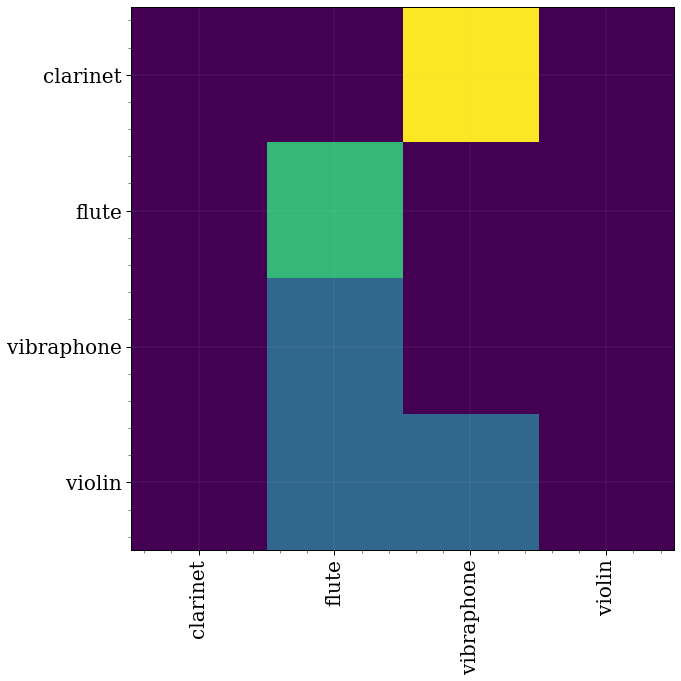

In [44]:
from sklearn.metrics import confusion_matrix
plt.imshow(confusion_matrix(y_test, model.predict(X_test)))
plt.xticks([0, 1, 2, 3], cat.categories, rotation=90)
plt.yticks([0, 1, 2, 3], cat.categories);

## Tarefas

1. Altere o código acima para extrair mais features usando LibRosa
1. Compare outros classificadores via SKLearn
1. Adicione mais exemplos
   1. Aqui você pode pegar diferentes partes de um mesmo áudio para aumentar a base

### Import dos dados

Inicialmente, temos que pegar os áudios do disco.

In [45]:
# Get data from disk
raw_data = {}
rates = set()

for fpath in glob.glob('instrument/*/*.wav'):
    inst_name = fpath.split('/')[1]
#     if inst_name in raw_data and len(raw_data[inst_name]) == 4:
#         continue
        
    audio, sr = librosa.load(fpath)
    rates.add(sr)
    
    if inst_name not in raw_data:
        raw_data[inst_name] = []
        
    raw_data[inst_name].append(audio)

Um primeiro pré-processamento, como sugerido, é pegar mais de uma amostra de cada arquivo. Aqui, pegaremos amostras de igual tamanho de todos os arquivos, sendo esse tamanho o do menor arquivo disponível.

In [46]:
def find_min_len(raw_data):
    """
    Finds smallest audio length in raw data obtained
    """
    min_len = None
    for inst in raw_data:
        for aud in raw_data[inst]:
            if (min_len is None) or (min_len is not None and len(aud) < min_len):
                min_len = len(aud)
    return min_len
find_min_len(raw_data)

15269

In [47]:
new_raw_data = {}
min_len = find_min_len(raw_data)

# Spit audio files into same-size samples
# Size length will be the smallest audio size from data
# The last sample (smaller than minimum) will be discarded
for inst in raw_data:
    new_raw_data[inst] = []
    for audio in raw_data[inst]:
        audio_len = len(audio)
        pieces = audio_len // min_len
        for i in range(pieces):
            #print(f"Piece {i}: (i*(min_len)},{(i+1)*min_len})")
            piece = audio[(i*min_len):((i+1)*min_len)]
            new_raw_data[inst].append(piece)
find_min_len(new_raw_data)

15269

### Extração de Features

Com amostras de mesmo tamanho, as features tendem a seguir esse padrão, ou seja, terão os mesmos tamanhos também.

Vamos criar o dataframe para guardar os dados. Usaremos as features que retornam apenas um vetor unidimensional, para facilitar. Cada um deles retorna um vetor (1,30).

In [48]:
names = ['instrument']
features = ['spectral_centroid','spectral_bandwidth','spectral_flatness',
            'spectral_rolloff','zero_crossing_rate','rms']
for feature in features:
    for i in range(30):
        names.append(f'{feature}_{i}')
df = pd.DataFrame(columns=names)
df

Empty DataFrame
Columns: [instrument, spectral_centroid_0, spectral_centroid_1, spectral_centroid_2, spectral_centroid_3, spectral_centroid_4, spectral_centroid_5, spectral_centroid_6, spectral_centroid_7, spectral_centroid_8, spectral_centroid_9, spectral_centroid_10, spectral_centroid_11, spectral_centroid_12, spectral_centroid_13, spectral_centroid_14, spectral_centroid_15, spectral_centroid_16, spectral_centroid_17, spectral_centroid_18, spectral_centroid_19, spectral_centroid_20, spectral_centroid_21, spectral_centroid_22, spectral_centroid_23, spectral_centroid_24, spectral_centroid_25, spectral_centroid_26, spectral_centroid_27, spectral_centroid_28, spectral_centroid_29, spectral_bandwidth_0, spectral_bandwidth_1, spectral_bandwidth_2, spectral_bandwidth_3, spectral_bandwidth_4, spectral_bandwidth_5, spectral_bandwidth_6, spectral_bandwidth_7, spectral_bandwidth_8, spectral_bandwidth_9, spectral_bandwidth_10, spectral_bandwidth_11, spectral_bandwidth_12, spectral_bandwidth_13, spectral_bandwidth_14, spectral_bandwidth_15, spectral_bandwidth_16, spectral_bandwidth_17, spectral_bandwidth_18, spectral_bandwidth_19, spectral_bandwidth_20, spectral_bandwidth_21, spectral_bandwidth_22, spectral_bandwidth_23, spectral_bandwidth_24, spectral_bandwidth_25, spectral_bandwidth_26, spectral_bandwidth_27, spectral_bandwidth_28, spectral_bandwidth_29, spectral_flatness_0, spectral_flatness_1, spectral_flatness_2, spectral_flatness_3, spectral_flatness_4, spectral_flatness_5, spectral_flatness_6, spectral_flatness_7, spectral_flatness_8, spectral_flatness_9, spectral_flatness_10, spectral_flatness_11, spectral_flatness_12, spectral_flatness_13, spectral_flatness_14, spectral_flatness_15, spectral_flatness_16, spectral_flatness_17, spectral_flatness_18, spectral_flatness_19, spectral_flatness_20, spectral_flatness_21, spectral_flatness_22, spectral_flatness_23, spectral_flatness_24, spectral_flatness_25, spectral_flatness_26, spectral_flatness_27, spectral_flatness_28, spectral_flatness_29, spectral_rolloff_0, spectral_rolloff_1, spectral_rolloff_2, spectral_rolloff_3, spectral_rolloff_4, spectral_rolloff_5, spectral_rolloff_6, spectral_rolloff_7, spectral_rolloff_8, ...]
Index: []

[0 rows x 181 columns]

In [49]:
def extract_features_audio(audio, features, expected_size=30):
    """
    Extracts a selected set of features from an audio sample.
    
    Parameters:
        audio: the audio sample
        features: the feature list (from librosa.features)
        expected_size: expected feature shape (default=30)
    
    Return:
        extracted: array with computed features juxtaposed (concatenated)
    """
    extracted = np.reshape(np.array([]), (1,0))
    for feature in features:
        func = getattr(librosa.feature, feature)
        result = func(y=audio)
        assert (result.shape[1] == expected_size)
        extracted = np.concatenate((extracted, result), axis=1)
    return extracted

#         centroid = librosa.feature.spectral_centroid(y=aud)   # 1x30
#         #contrast = librosa.feature.spectral_contrast(y=aud)   # 7x30
#         bandwidth = librosa.feature.spectral_bandwidth(y=aud) # 1x30
#         flatness = librosa.feature.spectral_flatness(y=aud)   # 1x30
#         #poly_features = librosa.feature.poly_features(y=aud)  # 2x30
#         #tonnetz = librosa.feature.tonnetz(y=aud)  # 6x30 + warnings
#         spectral_rolloff = librosa.feature.spectral_rolloff(y=aud)  # 1x30
#         zero_crossing_rate = librosa.feature.zero_crossing_rate(y=aud)  # 1x30
#         #mfcc = librosa.feature.mfcc(y=aud)  # 20x30
#         rms = librosa.feature.rms(y=aud)  # 1x30

In [50]:
df = df.iloc[0:0]   # Clear dataframe
expected_size = 30  # Expected size of each feature

for inst in new_raw_data:
    print(inst)
    for aud in new_raw_data[inst]:
        extracted = extract_features_audio(aud, features, expected_size)
        row = {}
        
        for feature in features:
            idx = features.index(feature)
            for i in range(expected_size):
                #print(f'{feature}_{i}', f'extracted_idx={(idx*expected_size)+i}')
                row[f'{feature}_{i}'] = extracted[0, (idx*expected_size)+i]
        row['instrument'] = inst
        df = df.append(row, ignore_index=True)

flute
violin
clarinet
vibraphone


In [51]:
df.shape

(2993, 181)

In [52]:
df.head()

instrument  spectral_centroid_0  spectral_centroid_1  spectral_centroid_2  \
0      flute             0.000000             0.000000             0.000000   
1      flute          1152.806971          1250.569636          1464.601211   
2      flute          1500.851340          1497.974291          1494.733850   
3      flute          1250.091108          1303.093897          1450.868785   
4      flute          2594.447385          2388.495957          2014.504231   

   spectral_centroid_3  spectral_centroid_4  spectral_centroid_5  \
0         10269.400727          1904.814588          2220.859214   
1          1479.912582          1450.135403          1447.299672   
2          1521.477730          1549.520637          1554.216789   
3          1457.739618          1442.148864          1406.864168   
4             0.000000             0.000000             0.000000   

   spectral_centroid_6  spectral_centroid_7  spectral_centroid_8  ...  \
0          2496.618525          2354.613023          2513.407641  ...   
1          1455.854400          1445.376135          1465.188792  ...   
2          1520.869901          1530.353943          1587.620522  ...   
3          1393.415842          1391.063843          1386.478153  ...   
4          2485.701778          2702.950986          2809.970000  ...   

     rms_20    rms_21    rms_22    rms_23    rms_24    rms_25    rms_26  \
0  0.028973  0.035848  0.041227  0.043016  0.044056  0.044940  0.045726   
1  0.053018  0.053148  0.054078  0.055492  0.056404  0.056325  0.056167   
2  0.053149  0.054319  0.055482  0.055932  0.055426  0.054851  0.054166   
3  0.002264  0.000806  0.000445  0.000408  0.000388  0.000342  0.000337   
4  0.001403  0.004385  0.014318  0.022591  0.028144  0.032406  0.035607   

     rms_27    rms_28    rms_29  
0  0.046086  0.045969  0.046150  
1  0.055673  0.055280  0.055055  
2  0.054236  0.054461  0.053971  
3  0.000306  0.000295  0.000321  
4  0.038088  0.040595  0.043263  

[5 rows x 181 columns]

Para evitar ter que refazer tudo, podemos salvar o dataframe no disco como backup

In [53]:
df.to_pickle('df.pkl')

In [54]:
df = pd.read_pickle('df.pkl')

In [55]:
df.head()

instrument  spectral_centroid_0  spectral_centroid_1  spectral_centroid_2  \
0      flute             0.000000             0.000000             0.000000   
1      flute          1152.806971          1250.569636          1464.601211   
2      flute          1500.851340          1497.974291          1494.733850   
3      flute          1250.091108          1303.093897          1450.868785   
4      flute          2594.447385          2388.495957          2014.504231   

   spectral_centroid_3  spectral_centroid_4  spectral_centroid_5  \
0         10269.400727          1904.814588          2220.859214   
1          1479.912582          1450.135403          1447.299672   
2          1521.477730          1549.520637          1554.216789   
3          1457.739618          1442.148864          1406.864168   
4             0.000000             0.000000             0.000000   

   spectral_centroid_6  spectral_centroid_7  spectral_centroid_8  ...  \
0          2496.618525          2354.613023          2513.407641  ...   
1          1455.854400          1445.376135          1465.188792  ...   
2          1520.869901          1530.353943          1587.620522  ...   
3          1393.415842          1391.063843          1386.478153  ...   
4          2485.701778          2702.950986          2809.970000  ...   

     rms_20    rms_21    rms_22    rms_23    rms_24    rms_25    rms_26  \
0  0.028973  0.035848  0.041227  0.043016  0.044056  0.044940  0.045726   
1  0.053018  0.053148  0.054078  0.055492  0.056404  0.056325  0.056167   
2  0.053149  0.054319  0.055482  0.055932  0.055426  0.054851  0.054166   
3  0.002264  0.000806  0.000445  0.000408  0.000388  0.000342  0.000337   
4  0.001403  0.004385  0.014318  0.022591  0.028144  0.032406  0.035607   

     rms_27    rms_28    rms_29  
0  0.046086  0.045969  0.046150  
1  0.055673  0.055280  0.055055  
2  0.054236  0.054461  0.053971  
3  0.000306  0.000295  0.000321  
4  0.038088  0.040595  0.043263  

[5 rows x 181 columns]

### Preparação

Temos que separar em X e y.

In [56]:
cat = pd.Categorical(df['instrument'])
y = cat.codes
X = df.iloc[:, 1:].values

In [57]:
X.shape

(2993, 180)

In [58]:
y

array([1, 1, 1, ..., 2, 2, 2], dtype=int8)

Temos que dividir entre treino e teste também. É importante que grupos dois tenham membros das três categorias, por isso o parâmetro 'stratify' na chamada. 

In [59]:
from sklearn.model_selection import train_test_split
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, 
                                                            stratify=y,
                                                            test_size=0.50, 
                                                            random_state=42)

In [60]:
X_train_val.shape, X_test.shape, y_train_val.shape, y_test.shape

((1496, 180), (1497, 180), (1496,), (1497,))

Apenas para conferir, podemos ver a quantidade de cada instrumento no treino e no teste.

In [61]:
# Train
values, counts = np.unique(y_train_val, return_counts=True)
list(zip(values, counts))

[(0, 74), (1, 77), (2, 27), (3, 1318)]

In [62]:
# Test
values, counts = np.unique(y_test, return_counts=True)
list(zip(values, counts))

[(0, 73), (1, 78), (2, 27), (3, 1319)]

### Treinamento

Vamos usar a ideia do notebook de MTG e usar vários algoritmos e compará-los entre si.

In [63]:
from sklearn.pipeline import Pipeline
import scipy.stats as stats

from scipy.stats import loguniform
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


pipe = Pipeline([('classifier', RandomForestClassifier())])
search_space = [{'classifier': [KNeighborsClassifier()],
                 'classifier__n_neighbors': [5,10,15, 25, 30],
                 'classifier__weights': ['uniform', 'distance'],
                 'classifier__algorithm' : ['auto', 'ball_tree', 'kd_tree']},
                {'classifier': [RandomForestClassifier()],
                 'classifier__n_estimators': [10, 100, 1000],
                 'classifier__max_features': [1, 2, 3, 'auto'],
                 'classifier__criterion': ["gini", "entropy"],
                 'classifier__bootstrap': [True],
                 'classifier__oob_score': [True, False]},
                {'classifier': [SVC()],
                 'classifier__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                 'classifier__C': loguniform(1e-4, 1e0),
                 'classifier__gamma' : ['scale', 'auto']}
               ]

É importante normalizar os dados, para melhor desempenho nos vários algoritmos de aprendizado. Assim, usaremos os dados do treino para padronizar a base (e posteriormente esse mesmo objeto "treinado" para padronizar o teste).

In [64]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
norm_X_train_val = scaler.fit_transform(X_train_val)
norm_X_test = scaler.transform(X_test)

Para encontrar o melhor modelo e os hiperparâmetros, podemos usar o (Randomized)GridSearch. Como critério de decisão, usaremos a precisão balanceada por classes, já que temos um dataset desbalanceado.

In [65]:
from sklearn.model_selection import RandomizedSearchCV
 
clf = RandomizedSearchCV(pipe, search_space, 
                         n_iter=50, cv=5, verbose=1, 
                         random_state=42, n_jobs=3,
                         scoring='balanced_accuracy')
best_model = clf.fit(norm_X_train_val, y_train_val)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  83 tasks      | elapsed:    4.1s
[Parallel(n_jobs=3)]: Done 245 out of 250 | elapsed:   25.2s remaining:    0.5s
[Parallel(n_jobs=3)]: Done 250 out of 250 | elapsed:   27.1s finished


In [66]:
best_model.best_estimator_.get_params()['classifier']

RandomForestClassifier(n_estimators=1000, oob_score=True)

In [67]:
best_model.best_score_

0.7944906218622949

### Desempenho nos Testes

Vamos usar a RandomForest, que apresentou o melhor resultado no treino

In [68]:
model = best_model

In [69]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score
print("Accuracy = ", accuracy_score(y_test, model.predict(norm_X_test)))
print("Balanced accuracy = ", balanced_accuracy_score(y_test, model.predict(norm_X_test)))

Accuracy =  0.9599198396793587
Balanced accuracy =  0.7626212184330102


Por fim, vamos ver a matriz de confusão do modelo nos testes

In [70]:
def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, normalize_axis=1):
    """
    Pretty plots a confusion matrix. Can normalize values (summing by rows 
    or by columns).
    """
    import seaborn as sns
    C = confusion_matrix(y_true, y_pred)
    if (normalize):  
        C = C / C.astype(np.float).sum(axis=normalize_axis, keepdims=True) 
    conf_mat = pd.DataFrame(C, columns = classes, index = classes)    
    conf_mat.index.name = 'Actual'
    conf_mat.columns.name = 'Predicted'
    plt.figure(figsize = (7, 5))
    sns.set(font_scale = 1.2)
    sns.heatmap(conf_mat, cmap = "Blues", annot_kws = {"size": 12}, annot = True);

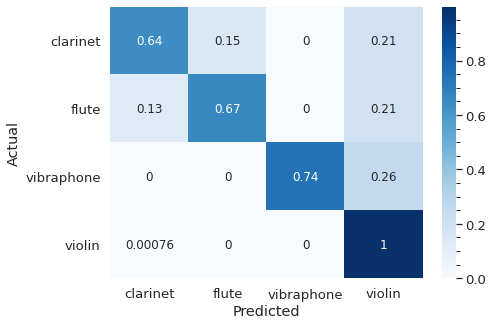

In [71]:
classes = np.unique(df.instrument)
plot_confusion_matrix(y_test, model.predict(norm_X_test), classes, normalize=True)

O modelo confundiu bastante o clarinete com a flauta, confusão essa que não ocorreu tanto com relação ao vibrafone. Isso pode ser decorrência de uma maior abundância de amostras de violino e vibrafone. Ainda assim, várias amostras de outros instrumentos foram incorretamente classificadas como violino.

## Referências

O notebook acima foi inspirado no curso da MTG.

1. https://github.com/MTG/MIRCourse/blob/master/notebooks/Lecture1_IntroWithACaseStudy.ipynb